## Importing the basic libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import string
import nltk
from langdetect import detect
import pycountry
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.stem import WordNetLemmatizer

## Reading the dataset

In [2]:
df = pd.read_csv('train_data.txt',delimiter=':::',engine='python')

In [3]:
df.columns = ['Index','Title','genre','plot']

In [4]:
df.drop(['Index'],axis=1,inplace=True)

In [5]:
print(df.shape)
df.head()

(54213, 3)


,Title,genre,plot
0,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


## Preprocessing the datasets

In [6]:
labels = list(set(df['genre']))
labels

[' news ',
 ' short ',
 ' war ',
 ' reality-tv ',
 ' adventure ',
 ' music ',
 ' history ',
 ' mystery ',
 ' talk-show ',
 ' action ',
 ' western ',
 ' biography ',
 ' game-show ',
 ' musical ',
 ' animation ',
 ' family ',
 ' documentary ',
 ' crime ',
 ' horror ',
 ' romance ',
 ' thriller ',
 ' fantasy ',
 ' comedy ',
 ' sport ',
 ' sci-fi ',
 ' adult ',
 ' drama ']

In [7]:
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
label2id

{' news ': 0,
 ' short ': 1,
 ' war ': 2,
 ' reality-tv ': 3,
 ' adventure ': 4,
 ' music ': 5,
 ' history ': 6,
 ' mystery ': 7,
 ' talk-show ': 8,
 ' action ': 9,
 ' western ': 10,
 ' biography ': 11,
 ' game-show ': 12,
 ' musical ': 13,
 ' animation ': 14,
 ' family ': 15,
 ' documentary ': 16,
 ' crime ': 17,
 ' horror ': 18,
 ' romance ': 19,
 ' thriller ': 20,
 ' fantasy ': 21,
 ' comedy ': 22,
 ' sport ': 23,
 ' sci-fi ': 24,
 ' adult ': 25,
 ' drama ': 26}

In [8]:
df["genre_id"] = df["genre"].apply(lambda x: label2id[x])
df

,Title,genre,plot,genre_id
0,Cupid (1997),thriller,A brother and sister with a past incestuous r...,20
1,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,25
2,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,26
3,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,26
4,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,16
...,...,...,...,...
54208,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,22
54209,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,18
54210,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",16
54211,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,22


## Detecting the language of plot

In [9]:
def detect_language(text):
    try:
        return pycountry.languages.get(alpha_2=detect(text)).name.lower()
    except:
        return 'Unknown'
df['Language'] = df['plot'].apply(detect_language)
df.head()

,Title,genre,plot,genre_id,Language
0,Cupid (1997),thriller,A brother and sister with a past incestuous r...,20,english
1,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,25,english
2,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,26,english
3,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,26,english
4,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,16,english


## Removing non-english plot

In [10]:
movie_df = df[df.Language.isin(['english'])]
movie_df.shape

(53840, 5)

## Cleaning the data for unwanted punctuation

In [11]:
def clean_text(text):
    text = re.sub('Mail <svaradi@sprynet.com> for translation. ','',text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(f'[{string.punctuation}]','',text)
    text = re.sub(f'[{string.digits}]','',text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    return text
movie_df.iloc[:,2] = movie_df['plot'].apply(clean_text)

## Cleaned Dataset

In [14]:
X ,y= movie_df['plot'],movie_df['genre_id']

## Train-Test splitting of the dataset

In [20]:
X_train,X_test,y_train,y_test  = train_test_split(
        X,y, test_size=0.2)

In [21]:
#Calculating the size of train and test set
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(43072,) (43072,)
(10768,) (10768,)


## Applying tf-idf to training and test Data

In [23]:
#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to testing data
X_test_tf = tf_idf.transform(X_test)

In [25]:
#Checking the features of the transformed dataset
print(X_train_tf.shape)
print(X_train_tf[10])

(43072, 121156)
  (0, 66022)	0.02620276969968517
  (0, 18517)	0.023359472046542113
  (0, 45484)	0.027356221877226614
  (0, 41889)	0.026444714647361135
  (0, 32760)	0.03551652454302154
  (0, 11278)	0.035925907716958104
  (0, 103797)	0.02753846590016814
  (0, 89897)	0.03135449917674137
  (0, 243)	0.02738101119210526
  (0, 85064)	0.03192294020618795
  (0, 60914)	0.101756493189015
  (0, 34742)	0.04496421778009693
  (0, 93871)	0.025660358708999353
  (0, 32581)	0.04442730096674762
  (0, 62330)	0.03911392347888448
  (0, 87894)	0.03559605569054815
  (0, 115655)	0.03836792775542751
  (0, 2544)	0.05478299607806073
  (0, 46357)	0.036216351559634236
  (0, 551)	0.03567672574757159
  (0, 2831)	0.04277476635119214
  (0, 45393)	0.06052149584786874
  (0, 80079)	0.029851413140141003
  (0, 105001)	0.0441768880648279
  (0, 38324)	0.04859411457191857
  :	:
  (0, 117485)	0.023142377594839704
  (0, 9151)	0.043486361531166
  (0, 108819)	0.09134710317620874
  (0, 117330)	0.018245326631897818
  (0, 103793)	0.02

## Creating the model

In [26]:
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()

## Training the model

In [27]:
#Training the classifier model
naive_bayes_classifier.fit(X_train_tf, y_train)

MultinomialNB()

## Testing the accuracy of the test set

In [39]:
## Classification report
y_pred = naive_bayes_classifier.predict(X_test_tf)
print(metrics.classification_report(y_test, y_pred, target_names=list(label2id.keys())))


               precision    recall  f1-score   support

        news        0.00      0.00      0.00        37
       short        0.00      0.00      0.00      1064
         war        0.00      0.00      0.00        22
  reality-tv        0.00      0.00      0.00       171
   adventure        0.00      0.00      0.00       160
       music        0.00      0.00      0.00       125
     history        0.00      0.00      0.00        43
     mystery        0.00      0.00      0.00        80
   talk-show        0.00      0.00      0.00        71
      action        0.00      0.00      0.00       270
     western        0.00      0.00      0.00       215
   biography        0.00      0.00      0.00        51
   game-show        0.00      0.00      0.00        31
     musical        0.00      0.00      0.00        53
   animation        0.00      0.00      0.00       118
      family        0.00      0.00      0.00       149
 documentary        0.54      0.90      0.68      2603
       cr

/home/bishal/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bishal/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bishal/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion matrix

In [41]:
# Confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   35,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  476,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  588],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    6,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   16],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  135,    0,    0,    0,    0,    0,
           1,    0,    0,    0,   35],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   51,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  109],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    

## Plotting the confusion matrix to evaluate which label is being misclassified

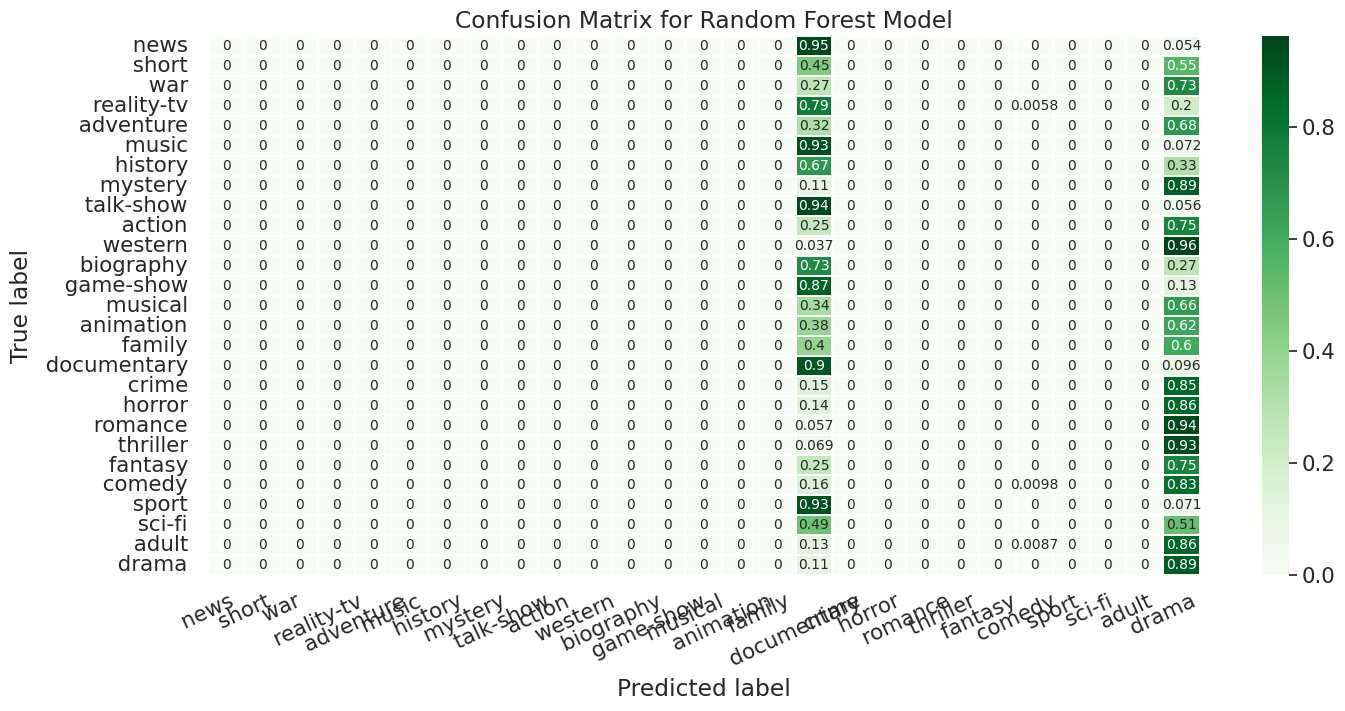

In [46]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = list(label2id.keys())
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## In this way we can use tf-idf (vectorized token) and naive bayes classifier to classify movie genre